# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

# Loading data and EDA

In [ ]:
df = pd.read_csv("cement_slump.csv")
df.head()

Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.  SLUMP(cm)  \
0   273.0   82.0    105.0  210.0   9.0         904.0       680.0       23.0   
1   163.0  149.0    191.0  180.0  12.0         843.0       746.0        0.0   
2   162.0  148.0    191.0  179.0  16.0         840.0       743.0        1.0   
3   162.0  148.0    190.0  179.0  19.0         838.0       741.0        3.0   
4   154.0  112.0    144.0  220.0  10.0         923.0       658.0       20.0   

   FLOW(cm)  Compressive Strength (28-day)(Mpa)  
0      62.0                               34.99  
1      20.0                               41.14  
2      20.0                               41.81  
3      21.5                               42.08  
4      64.0                               26.82

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [ ]:
df.describe().T   #std > mean olduğu yerlerde outlier durumu oluyor.

count        mean        std     min  \
Cement                              103.0  229.894175  78.877230  137.00   
Slag                                103.0   77.973786  60.461363    0.00   
Fly ash                             103.0  149.014563  85.418080    0.00   
Water                               103.0  197.167961  20.208158  160.00   
SP                                  103.0    8.539806   2.807530    4.40   
Coarse Aggr.                        103.0  883.978641  88.391393  708.00   
Fine Aggr.                          103.0  739.604854  63.342117  640.60   
SLUMP(cm)                           103.0   18.048544   8.750844    0.00   
FLOW(cm)                            103.0   49.610680  17.568610   20.00   
Compressive Strength (28-day)(Mpa)  103.0   36.038738   7.837120   17.19   

                                       25%     50%      75%      max  
Cement                              152.00  248.00  303.900   374.00  
Slag                                  0.05  100.00  125.000   193.00  
Fly ash                             115.50  164.00  235.950   260.00  
Water                               180.00  196.00  209.500   240.00  
SP                                    6.00    8.00   10.000    19.00  
Coarse Aggr.                        819.50  879.00  952.800  1049.90  
Fine Aggr.                          684.50  742.70  788.000   902.00  
SLUMP(cm)                            14.50   21.50   24.000    29.00  
FLOW(cm)                             38.50   54.00   63.750    78.00  
Compressive Strength (28-day)(Mpa)   30.90   35.52   41.205    58.53

In [ ]:
df.corr()['Compressive Strength (28-day)(Mpa)'] #target column ile features arasındaki ilişkiye baktım.Yüzde 50 altında hepsi.Yüzde 90a çıkan multicol.

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

## Graphical analysis

<AxesSubplot:>

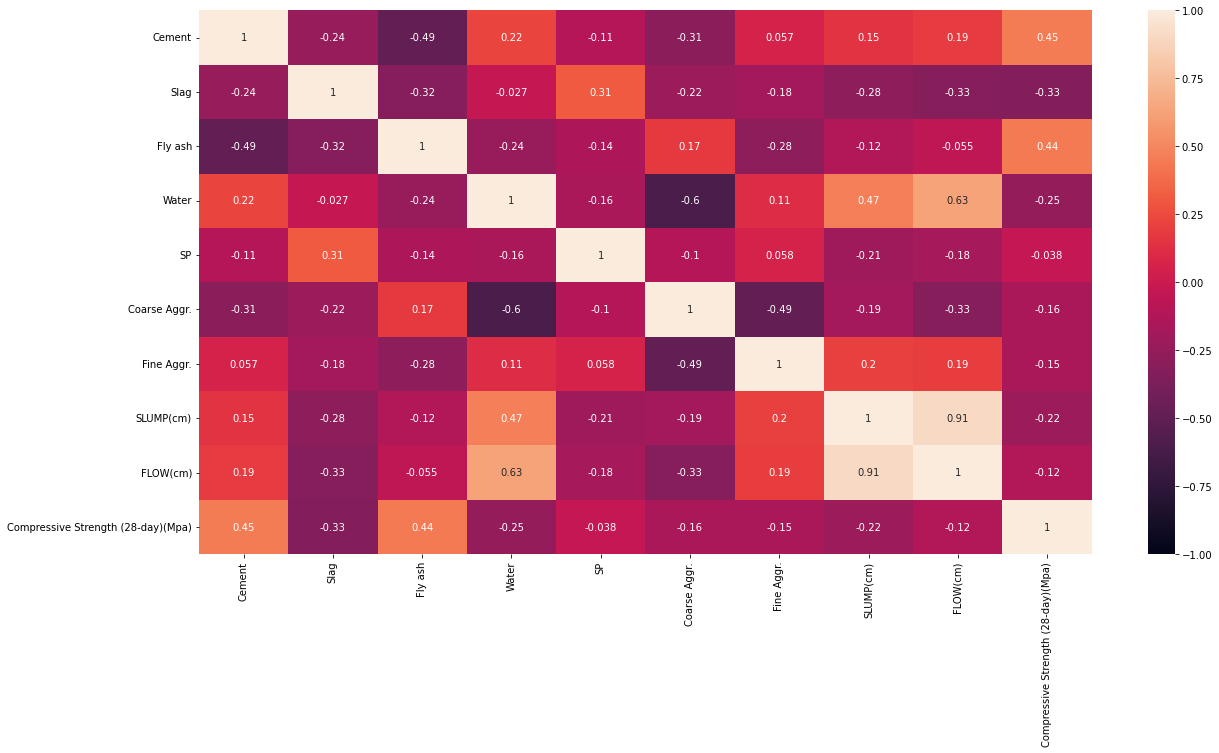

In [ ]:
plt.figure(figsize=(20,10))                          #flow ve slump yüzde 90 üzeri corele.Multicol.olduklarını gösterir.
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1)

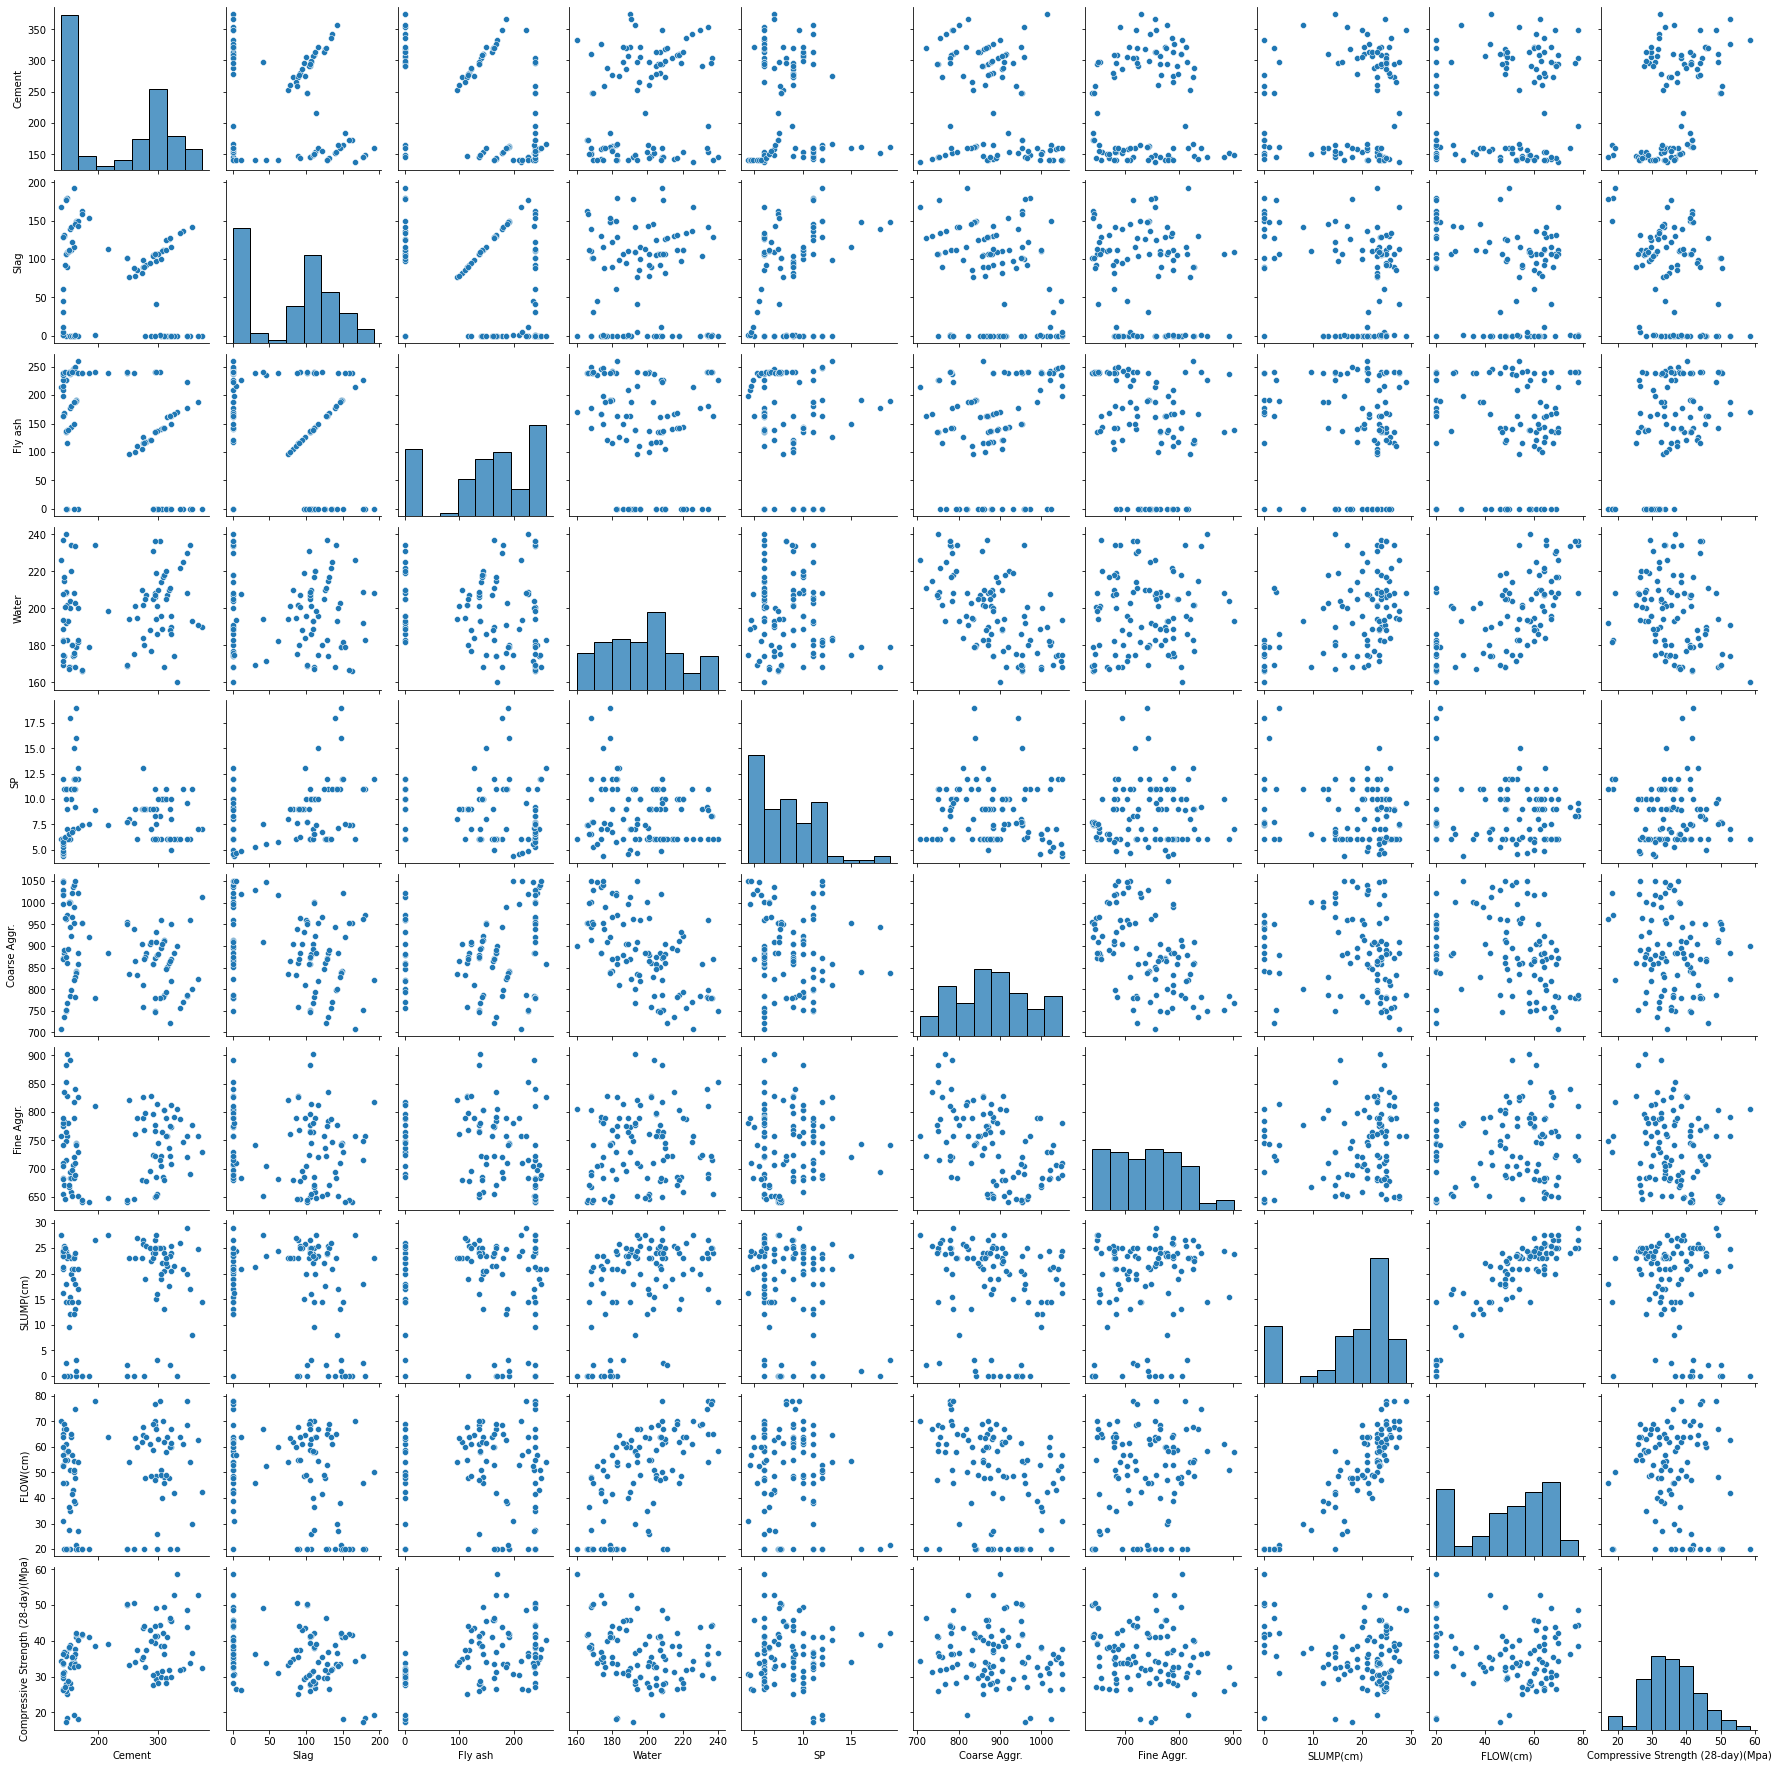

In [ ]:
sns.pairplot(df)  #data küçük olduğunda iyi.

<AxesSubplot:>

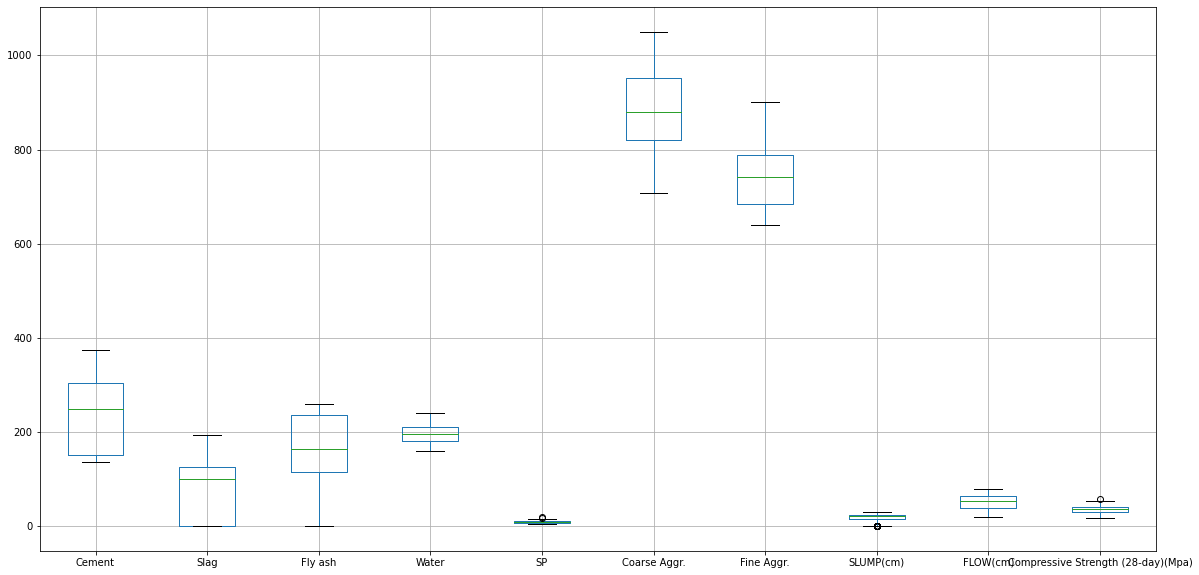

In [ ]:
plt.figure(figsize =(20,10))  #Features are different scaled.I should scaled them.box plot also shows this. 
df.boxplot()

### Train | Test Split

In [ ]:
X = df.drop("Compressive Strength (28-day)(Mpa)", axis =1)
y = df["Compressive Strength (28-day)(Mpa)"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

## Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  
scaler = StandardScaler()

In [ ]:
#scaling fit ve transform train set üzerinden yapılır.
scaler.fit(X_train)         

StandardScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test) 
# data leakage olmasın diye train değerleriyle test datasında transform yapıyoruz


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [ ]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [ ]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

linear_train  linear_test
R2        0.907145     0.911967
mae       1.936263     1.740383
mse       5.874313     4.454237
rmse      2.423698     2.110506

## Cross Validate

In [ ]:
#from sklearn.metrics import SCORERS
#list(SCORERS.keys())

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score

In [ ]:
model = LinearRegression() # modelimi sıfırladım.
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \  #R2 maximize ederken diğerlerini minimize etmeye çalışamaz aynı fonk içinde.oyüzden eksiden max ediyoruz.
                                                            'neg_root_mean_squared_error'], cv = 5)

In [ ]:
pd.DataFrame(scores, index = range(1,6))

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1  0.001994    0.002000  0.942208                     -1.908524   
2  0.002001    0.002004  0.706629                     -2.647319   
3  0.001999    0.001996  0.865934                     -1.482831   
4  0.002002    0.001001  0.923166                     -2.244108   
5  0.001999    0.001997  0.792889                     -2.867905   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                    -4.645188                         -2.155270  
2                   -10.756658                         -3.279734  
3                    -3.725762                         -1.930223  
4                    -8.434009                         -2.904137  
5                   -11.698265                         -3.420273

In [ ]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

# cross_validation, test setinden aldığımız tek seferlik score ın tutarlı olup olmadığını doğrulamak için yapılır
# train score ile cross validation score kıyaslanıp over fittinge karar verilir
#Burada gördüm ki 0.91lik score datanın iyi kısmına denk gelmiş.cv sonrası score düştü.

test_r2                             0.846165
test_neg_mean_absolute_error       -2.230137
test_neg_mean_squared_error        -7.851977
test_neg_root_mean_squared_error   -2.737927
dtype: float64

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear") #kıyaslama adına cv öncesi sonuçları çağırdım.

linear_train  linear_test
R2        0.907145     0.911967
mae       1.936263     1.740383
mse       5.874313     4.454237
rmse      2.423698     2.110506

In [ ]:
# Hataları yüzde olarak karşılaştırıyoruz.Hata oranının cv sonrası yükseldiğini gördüm.
print("train RMSE:", 2.423698/df["Compressive Strength (28-day)(Mpa)"].mean())
print("CV RMSE:", 2.737927/df["Compressive Strength (28-day)(Mpa)"].mean())

train RMSE: 0.06725257718905493
CV RMSE: 0.07597177821060941


In [ ]:
lm.coef_

array([ 4.28015177, -2.22287954,  3.9320198 , -4.77083923,  0.12109966,
       -5.27729122, -2.61131342, -2.18837804,  1.46570621])

In [ ]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

lm_coef
0  4.280152
1 -2.222880
2  3.932020
3 -4.770839
4  0.121100
5 -5.277291
6 -2.611313
7 -2.188378
8  1.465706

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
# Ridge ile modele hata(bias) ekleyerek train-test arası variance düşürüyoruz
# alpha büyüdükçe regularization artar

In [ ]:
ridge_model = Ridge(alpha=1, random_state=42)
# büyük alpha büyük bias(hata) , yani büyük regularization demek

In [ ]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [ ]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [ ]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

ridge_train  ridge_test
R2       0.906392    0.911204
mae      1.938096    1.732472
mse      5.921967    4.492822
rmse     2.433509    2.119628

In [ ]:
pd.concat([ls, rs], axis=1)  #train ve test scorlarını birbirine yakınlaştırmaya çalışıyoruz.genel mantık bu.

linear_train  linear_test  ridge_train  ridge_test
R2        0.907145     0.911967     0.906392    0.911204
mae       1.936263     1.740383     1.938096    1.732472
mse       5.874313     4.454237     5.921967    4.492822
rmse      2.423698     2.110506     2.433509    2.119628

## For Ridge Regression CV with alpha : 1 

In [ ]:
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
pd.DataFrame(scores, index = range(1, 6))

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1  0.002001    0.000998  0.945240                     -1.833921   
2  0.001002    0.000999  0.708976                     -2.650547   
3  0.000998    0.001008  0.870907                     -1.486357   
4  0.001002    0.001995  0.920560                     -2.256584   
5  0.001002    0.001000  0.805882                     -2.790111   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                    -4.401441                         -2.097961  
2                   -10.670620                         -3.266591  
3                    -3.587556                         -1.894085  
4                    -8.720125                         -2.952986  
5                   -10.964374                         -3.311250

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6)) #ridge cv scores 
scores.iloc[:,2:].mean()

test_r2                             0.850313
test_neg_mean_absolute_error       -2.203504
test_neg_mean_squared_error        -7.668823
test_neg_root_mean_squared_error   -2.704575
dtype: float64

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge") #ridge scores 2.43 ten 2.70e çıkmış.Overfit diyecek kadar anlamlı bir yükselme yok.

ridge_train  ridge_test
R2       0.906392    0.911204
mae      1.938096    1.732472
mse      5.921967    4.492822
rmse     2.433509    2.119628

In [ ]:
ridge_model.coef_

array([ 5.01092233, -1.37765187,  4.8062743 , -3.90644878,  0.26138511,
       -4.06644253, -1.74660531, -1.95498663,  1.13349998])

In [ ]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [ ]:
pd.concat([lm_df,rm_df], axis = 1) 
# predictiona etkisi olmayanları sıfıra yakınsattı
# büyük katsayılı feature önemli feature ve küçük katsayılılara önemsiz diyebilirim. AMA FEATURE SELECTION YAPAMAYIZ
# ridge ile önemli önemsiz gruplaması yaparız.

lm_coef  ridge_coef_1
0  4.280152      5.010922
1 -2.222880     -1.377652
2  3.932020      4.806274
3 -4.770839     -3.906449
4  0.121100      0.261385
5 -5.277291     -4.066443
6 -2.611313     -1.746605
7 -2.188378     -1.954987
8  1.465706      1.133500

## Choosing best alpha value with Cross-Validation

In [ ]:
from sklearn.linear_model import RidgeCV  #genelde gridsearch kullanıyorum.Ridge ve Lassoya özel RidgeCV VE LassoCV olduğu için burada onları tercih edicem.

In [ ]:
alpha_space = np.linspace(0.1, 1, 100)
alpha_space

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [ ]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 10, scoring= "neg_root_mean_squared_error")

In [ ]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.381818...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [ ]:
ridge_cv_model.alpha_

0.9181818181818181

In [ ]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)  # Ridge( alpha = 0.91)

In [ ]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv") 
rcs

ridge_cv_train  ridge_cv_test
R2          0.906476       0.911355
mae         1.937773       1.732412
mse         5.916637       4.485191
rmse        2.432414       2.117827

In [ ]:
pd.concat([ls, rs, rcs], axis = 1)

linear_train  linear_test  ridge_train  ridge_test  ridge_cv_train  \
R2        0.907145     0.911967     0.906392    0.911204        0.906476   
mae       1.936263     1.740383     1.938096    1.732472        1.937773   
mse       5.874313     4.454237     5.921967    4.492822        5.916637   
rmse      2.423698     2.110506     2.433509    2.119628        2.432414   

      ridge_cv_test  
R2         0.911355  
mae        1.732412  
mse        4.485191  
rmse       2.117827

In [ ]:
ridge_cv_model.coef_

array([ 5.00521265, -1.38945391,  4.79652108, -3.93170693,  0.25805802,
       -4.09232266, -1.76329842, -1.96996865,  1.15500214])

In [ ]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_0.91"])

In [ ]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1) 

lm_coef  ridge_coef_1  ridge_cv_coef_0.91
0  4.280152      5.010922            5.005213
1 -2.222880     -1.377652           -1.389454
2  3.932020      4.806274            4.796521
3 -4.770839     -3.906449           -3.931707
4  0.121100      0.261385            0.258058
5 -5.277291     -4.066443           -4.092323
6 -2.611313     -1.746605           -1.763298
7 -2.188378     -1.954987           -1.969969
8  1.465706      1.133500            1.155002

## LASSO

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

In [ ]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [ ]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [ ]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso") 
# ridge modelle kıyasladığımızda underfitting var diğer modellere göre. Hem scorelar düşmüş hem hatalar artmış.fine tunning yaparak scores iyileştirebiliriz
lss

lasso_train  lasso_test
R2       0.776425    0.801642
mae      2.959616    2.466012
mse     14.144056   10.036383
rmse     3.760858    3.168025

In [ ]:
pd.concat([ls, rs, rcs, lss], axis = 1)

linear_train  linear_test  ridge_train  ridge_test  ridge_cv_train  \
R2        0.907145     0.911967     0.906392    0.911204        0.906476   
mae       1.936263     1.740383     1.938096    1.732472        1.937773   
mse       5.874313     4.454237     5.921967    4.492822        5.916637   
rmse      2.423698     2.110506     2.433509    2.119628        2.432414   

      ridge_cv_test  lasso_train  lasso_test  
R2         0.911355     0.776425    0.801642  
mae        1.732412     2.959616    2.466012  
mse        4.485191    14.144056   10.036383  
rmse       2.117827     3.760858    3.168025

## For Lasso CV with Default Alpha : 1

In [ ]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
pd.DataFrame(scores, index = range(1, 6))

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1  0.002000    0.002006  0.831086                     -3.126533   
2  0.001995    0.001001  0.495530                     -3.395448   
3  0.003004    0.001996  0.678304                     -2.370875   
4  0.002021    0.000977  0.677039                     -4.407932   
5  0.002003    0.001015  0.729823                     -3.315409   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                   -13.576873                         -3.684681  
2                   -18.496783                         -4.300789  
3                    -8.940117                         -2.990003  
4                   -35.451310                         -5.954100  
5                   -15.260434                         -3.906461

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6))  # (5 features ile)  test_r2 = 0.68
                                                    # CV öncesi data iyi yere denk gelmiş.
scores.iloc[:,2:].mean()

test_r2                              0.682356
test_neg_mean_absolute_error        -3.323239
test_neg_mean_squared_error        -18.345104
test_neg_root_mean_squared_error    -4.167207
dtype: float64

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

lasso_train  lasso_test
R2       0.776425    0.801642
mae      2.959616    2.466012
mse     14.144056   10.036383
rmse     3.760858    3.168025

In [ ]:
lasso_model.coef_

array([ 4.82131411, -0.        ,  4.88005283, -0.81976891,  0.        ,
       -0.35149513, -0.        , -0.71063068, -0.        ])

In [ ]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1) #  ( 5 features ile)  test_r2 = 0.68

lm_coef  ridge_coef_1  ridge_cv_coef_0.91  lasso_coef_1
0  4.280152      5.010922            5.005213      4.821314
1 -2.222880     -1.377652           -1.389454     -0.000000
2  3.932020      4.806274            4.796521      4.880053
3 -4.770839     -3.906449           -3.931707     -0.819769
4  0.121100      0.261385            0.258058      0.000000
5 -5.277291     -4.066443           -4.092323     -0.351495
6 -2.611313     -1.746605           -1.763298     -0.000000
7 -2.188378     -1.954987           -1.969969     -0.710631
8  1.465706      1.133500            1.155002     -0.000000

### Choosing best alpha value with Cross-Validation

In [ ]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter=100000, random_state=42)

In [ ]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.381818...
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
        cv=10, max_iter=100000, random_state=42)

In [ ]:
lasso_cv_model.alpha_

0.1

In [ ]:
y_pred = lasso_cv_model.predict(X_test_scaled)   # Lasso(alpha =0.1)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [ ]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

lasso_cv_train  lasso_cv_test
R2          0.900491       0.907944
mae         1.966753       1.766723
mse         6.295287       4.657759
rmse        2.509041       2.158184

In [ ]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

linear_train  linear_test  ridge_train  ridge_test  ridge_cv_train  \
R2        0.907145     0.911967     0.906392    0.911204        0.906476   
mae       1.936263     1.740383     1.938096    1.732472        1.937773   
mse       5.874313     4.454237     5.921967    4.492822        5.916637   
rmse      2.423698     2.110506     2.433509    2.119628        2.432414   

      ridge_cv_test  lasso_train  lasso_test  lasso_cv_train  lasso_cv_test  
R2         0.911355     0.776425    0.801642        0.900491       0.907944  
mae        1.732412     2.959616    2.466012        1.966753       1.766723  
mse        4.485191    14.144056   10.036383        6.295287       4.657759  
rmse       2.117827     3.760858    3.168025        2.509041       2.158184

In [ ]:
lasso_cv_model.coef_

array([ 6.36058116,  0.        ,  6.44860782, -2.38557078,  0.46733827,
       -2.09003844, -0.22823288, -1.08177398,  0.        ])

In [ ]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.1"])

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1) # (7 fearures ile) test_r2 = 0.90

lm_coef  ridge_coef_1  ridge_cv_coef_0.91  lasso_coef_1  lasso_cv_coef_0.1
0  4.280152      5.010922            5.005213      4.821314           6.360581
1 -2.222880     -1.377652           -1.389454     -0.000000           0.000000
2  3.932020      4.806274            4.796521      4.880053           6.448608
3 -4.770839     -3.906449           -3.931707     -0.819769          -2.385571
4  0.121100      0.261385            0.258058      0.000000           0.467338
5 -5.277291     -4.066443           -4.092323     -0.351495          -2.090038
6 -2.611313     -1.746605           -1.763298     -0.000000          -0.228233
7 -2.188378     -1.954987           -1.969969     -0.710631          -1.081774
8  1.465706      1.133500            1.155002     -0.000000           0.000000

## Elastic net

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [ ]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [ ]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [ ]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

elastic_train  elastic_test
R2         0.636729      0.635031
mae        3.802838      3.555946
mse       22.981720     18.466419
rmse       4.793925      4.297257

In [ ]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

linear_train  linear_test  ridge_train  ridge_test  ridge_cv_train  \
R2        0.907145     0.911967     0.906392    0.911204        0.906476   
mae       1.936263     1.740383     1.938096    1.732472        1.937773   
mse       5.874313     4.454237     5.921967    4.492822        5.916637   
rmse      2.423698     2.110506     2.433509    2.119628        2.432414   

      ridge_cv_test  lasso_train  lasso_test  lasso_cv_train  lasso_cv_test  \
R2         0.911355     0.776425    0.801642        0.900491       0.907944   
mae        1.732412     2.959616    2.466012        1.966753       1.766723   
mse        4.485191    14.144056   10.036383        6.295287       4.657759   
rmse       2.117827     3.760858    3.168025        2.509041       2.158184   

      elastic_train  elastic_test  
R2         0.636729      0.635031  
mae        3.802838      3.555946  
mse       22.981720     18.466419  
rmse       4.793925      4.297257

## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [ ]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

test_r2  test_neg_mean_absolute_error  test_neg_mean_squared_error  \
1  0.570214                     -4.890605                   -34.545133   
2  0.460275                     -3.333896                   -19.789406   
3  0.542123                     -3.013683                   -12.724666   
4  0.537711                     -5.548235                   -50.745379   
5  0.604910                     -4.222511                   -22.315915   

   test_neg_root_mean_squared_error  
1                         -5.877511  
2                         -4.448529  
3                         -3.567165  
4                         -7.123579  
5                         -4.723972

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11)) #aslında daha da düşükmüş scorumuz.
scores.iloc[:,2:].mean()

test_r2                              0.543047
test_neg_mean_absolute_error        -4.201786
test_neg_mean_squared_error        -28.024100
test_neg_root_mean_squared_error    -5.148151
dtype: float64

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

elastic_train  elastic_test
R2         0.636729      0.635031
mae        3.802838      3.555946
mse       22.981720     18.466419
rmse       4.793925      4.297257

In [ ]:
elastic_model.coef_

array([ 2.61657059, -0.73015253,  2.67139945, -1.20195947,  0.        ,
       -1.16386814, -0.32234008, -0.82569551, -0.        ])

In [ ]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, L1:0.5)"])

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

lm_coef  ridge_coef_1  ridge_cv_coef_0.91  lasso_coef_1  \
0  4.280152      5.010922            5.005213      4.821314   
1 -2.222880     -1.377652           -1.389454     -0.000000   
2  3.932020      4.806274            4.796521      4.880053   
3 -4.770839     -3.906449           -3.931707     -0.819769   
4  0.121100      0.261385            0.258058      0.000000   
5 -5.277291     -4.066443           -4.092323     -0.351495   
6 -2.611313     -1.746605           -1.763298     -0.000000   
7 -2.188378     -1.954987           -1.969969     -0.710631   
8  1.465706      1.133500            1.155002     -0.000000   

   lasso_cv_coef_0.1  elastic_coef_(alp:1, L1:0.5)  
0           6.360581                      2.616571  
1           0.000000                     -0.730153  
2           6.448608                      2.671399  
3          -2.385571                     -1.201959  
4           0.467338                      0.000000  
5          -2.090038                     -1.163868  
6          -0.228233                     -0.322340  
7          -1.081774                     -0.825696  
8           0.000000                     -0.000000

## Grid Search for ElasticNet


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
elastic_model = ElasticNet(max_iter=10000, random_state=42) # tol=0.0001 ile ilgili uyarı alırsak max_iter i arttırmmız lazım

In [ ]:
param_grid = {"alpha":alpha_space,
            "l1_ratio":[0.1, 0.5, 0.7,0.9, 0.95, 1]}

In [ ]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [ ]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0

[CV] END .............alpha=0.1181818181818182, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.1181818181818182, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.1181818181818182, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.1181818181818182, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.1181818181818182, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.1181818181818182, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.1181818181818182, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.1181818181818182, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.1181818181818182, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.1181818181818182, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.1181818181818182, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.1181818181818182, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=0.13636363636363635, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.13636363636363635, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.13636363636363635, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.13636363636363635, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.13636363636363635, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.13636363636363635, l1_ratio=0.9; total time=   0.0s
[CV] END ...........alpha=0.13636363636363635, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.13636363636363635, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.13636363636363635, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.13636363636363635, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.13636363636363635, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.13636363636363635, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.

[CV] END ............alpha=0.16363636363636364, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.16363636363636364, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.16363636363636364, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.16363636363636364, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.16363636363636364, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.16363636363636364, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.16363636363636364, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.16363636363636364, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.16363636363636364, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.16363636363636364, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.16363636363636364, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.16363636363636364, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0

[CV] END ............alpha=0.19090909090909092, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.19090909090909092, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.19090909090909092, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.19090909090909092, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.19090909090909092, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.19090909090909092, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.19090909090909092, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.19090909090909092, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.19090909090909092, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.19090909090909092, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.19090909090909092, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.19090909090909092, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0

[CV] END ...............alpha=0.2090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.2090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.2090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.2090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.2090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.2090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.2090909090909091, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=0.2181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.2181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.2181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.2181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.2181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ..............alpha=0.23636363636363636, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.23636363636363636, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.23636363636363636, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.23636363636363636, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.23636363636363636, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.23636363636363636, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.23636363636363636, l1_ratio=1; total time=   0.0s
[CV] END ............alpha=0.24545454545454545, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.24545454545454545, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.24545454545454545, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.24545454545454545, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.24545454545454545, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0

[CV] END ............alpha=0.26363636363636367, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.26363636363636367, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.26363636363636367, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.26363636363636367, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.26363636363636367, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.26363636363636367, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.26363636363636367, l1_ratio=0.9; total time=   0.0s
[CV] END ...........alpha=0.26363636363636367, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.26363636363636367, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.26363636363636367, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.26363636363636367, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.26363636363636367, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.

[CV] END .............alpha=0.2909090909090909, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.2909090909090909, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.2909090909090909, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.2909090909090909, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.2909090909090909, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.2909090909090909, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.2909090909090909, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.2909090909090909, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.2909090909090909, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.2909090909090909, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.2909090909090909, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.2909090909090909, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0

[CV] END .............alpha=0.3181818181818182, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.3181818181818182, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.3181818181818182, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.3181818181818182, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.3181818181818182, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.3181818181818182, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.3181818181818182, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.3181818181818182, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.3181818181818182, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.3181818181818182, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.3181818181818182, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.3181818181818182, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0

[CV] END ............alpha=0.34545454545454546, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0

[CV] END ...........alpha=0.36363636363636365, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.36363636363636365, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.36363636363636365, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.36363636363636365, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.36363636363636365, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.36363636363636365, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.36363636363636365, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.36363636363636365, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.36363636363636365, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.36363636363636365, l1_ratio=0.95; total time=   0.0s
[CV] END ..............alpha=0.36363636363636365, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.36363636363636365, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha

[CV] END .............alpha=0.3909090909090909, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.3909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.3909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.3909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.3909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.3909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.3909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.3909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.3909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.3909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.3909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.3909090909090909, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=0.40909090909090906, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.40909090909090906, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.40909090909090906, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.40909090909090906, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.40909090909090906, l1_ratio=0.9; total time=   0.0s
[CV] END ...........alpha=0.40909090909090906, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.40909090909090906, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.40909090909090906, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.40909090909090906, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.40909090909090906, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.40909090909090906, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.40909090909090906, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.

[CV] END .............alpha=0.4363636363636364, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=0.4545454545454546, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.4545454545454546, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.4545454545454546, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.4545454545454546, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.4545454545454546, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.4545454545454546, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.4545454545454546, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.4545454545454546, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.4545454545454546, l1_ratio=0.95; total time=   0.0s
[CV] END ...............alpha=0.4545454545454546, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.4545454545454546, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.4545454545454546, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=0.4818181818181818, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4818181818181818, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4818181818181818, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4818181818181818, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4818181818181818, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4818181818181818, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4818181818181818, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4818181818181818, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4818181818181818, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4818181818181818, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4818181818181818, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4818181818181818, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ...................

[CV] END ...............alpha=0.5181818181818182, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.5181818181818182, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=0.5272727272727272, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.5272727272727272, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.5272727272727272, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.5272727272727272, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.5272727272727272, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.5272727272727272, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.5272727272727272, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.5272727272727272, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.5272727272727272, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.5272727272727272, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=0.5454545454545454, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5454545454545454, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5454545454545454, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5454545454545454, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.5454545454545454, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.5454545454545454, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.5454545454545454, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.5454545454545454, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.5454545454545454, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.5454545454545454, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.5454545454545454, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.5454545454545454, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0

[CV] END .............alpha=0.5727272727272728, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=0.5909090909090909, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.5909090909090909, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5909090909090909, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5909090909090909, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5909090909090909, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5909090909090909, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5909090909090909, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5909090909090909, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5909090909090909, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5909090909090909, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5909090909090909, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.5909090909090909, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0

[CV] END ................alpha=0.609090909090909, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=0.609090909090909, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=0.6363636363636364, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.6363636363636364, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.6363636363636364, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.6363636363636364, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.6363636363636364, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.6363636363636364, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.6363636363636364, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.6363636363636364, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.6363636363636364, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.6363636363636364, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.6363636363636364, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.6363636363636364, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=0.6545454545454545, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.6545454545454545, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.6545454545454545, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.6545454545454545, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.6545454545454545, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.6545454545454545, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.6545454545454545, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.6545454545454545, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.6545454545454545, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.6545454545454545, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.6545454545454545, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.6545454545454545, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0

[CV] END .............alpha=0.6818181818181818, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.6818181818181818, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.6818181818181818, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.6818181818181818, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.6818181818181818, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.6818181818181818, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.6818181818181818, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.6818181818181818, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.6818181818181818, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.6818181818181818, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.6818181818181818, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.6818181818181818, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.709090909090909, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=0.709090909090909, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha

[CV] END .............alpha=0.7272727272727272, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.7272727272727272, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.7272727272727272, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.7272727272727272, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.7272727272727272, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.7272727272727272, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.7272727272727272, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.7272727272727272, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.7272727272727272, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.7272727272727272, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.7272727272727272, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.7272727272727272, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END ...............alpha=0.7454545454545454, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.7454545454545454, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.7454545454545454, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.7454545454545454, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.7454545454545454, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.7454545454545454, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.7454545454545454, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=0.7545454545454545, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.7545454545454545, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.7545454545454545, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.7545454545454545, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.7545454545454545, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=0.7727272727272727, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.7727272727272727, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.7727272727272727, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7727272727272727, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7727272727272727, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7727272727272727, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7727272727272727, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7727272727272727, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7727272727272727, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7727272727272727, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7727272727272727, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7727272727272727, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0

[CV] END .............alpha=0.7999999999999999, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.7999999999999999, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.7999999999999999, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.7999999999999999, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.7999999999999999, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.7999999999999999, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.7999999999999999, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.7999999999999999, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.7999999999999999, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.7999999999999999, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.7999999999999999, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.7999999999999999, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=0.8181818181818181, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.8181818181818181, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.8181818181818181, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.8181818181818181, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.8181818181818181, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.8181818181818181, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.8181818181818181, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.8181818181818181, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.8181818181818181, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.8181818181818181, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8181818181818181, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8181818181818181, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0

[CV] END .............alpha=0.8454545454545453, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.8454545454545453, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.8454545454545453, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.8454545454545453, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.8454545454545453, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.8454545454545453, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.8454545454545453, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8454545454545453, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8454545454545453, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8454545454545453, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8454545454545453, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8454545454545453, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=0.8636363636363635, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.8636363636363635, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.8636363636363635, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8636363636363635, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8636363636363635, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8636363636363635, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8636363636363635, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8636363636363635, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8636363636363635, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8636363636363635, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8636363636363635, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8636363636363635, l1_ratio=0.95; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=0.8909090909090909, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=0.9090909090909091, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.9090909090909091, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.9090909090909091, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.9090909090909091, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.9090909090909091, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.9090909090909091, l1_ratio=0.95; total time=   0.0s
[CV] END ...............alpha=0.9090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.9090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.9090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.9090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.9090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.9090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=0.9363636363636363, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9363636363636363, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9363636363636363, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9363636363636363, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9363636363636363, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9363636363636363, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9363636363636363, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9363636363636363, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9363636363636363, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.9363636363636363, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.9363636363636363, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.9363636363636363, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=

[CV] END ...............alpha=0.9545454545454545, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.9545454545454545, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.9545454545454545, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=0.9636363636363636, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.9636363636363636, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.9636363636363636, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.9636363636363636, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.9636363636363636, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.9636363636363636, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.9636363636363636, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.9636363636363636, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.9636363636363636, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=0.9818181818181817, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.9818181818181817, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.9818181818181817, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.9818181818181817, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.9818181818181817, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.9818181818181817, l1_ratio=0.95; total time=   0.0s
[CV] END ...............alpha=0.9818181818181817, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.9818181818181817, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.9818181818181817, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.9818181818181817, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.9818181818181817, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.9818181818181817, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.318181...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
grid_model.best_params_ #elastic ner lassoyu tercih etmiş.best katsayıda 0.1

{'alpha': 0.1, 'l1_ratio': 1}

In [ ]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [ ]:
gm = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_grid")
gm

#r2 Scores birbirine yakın olması istenen iyi bir durum.

elastic_grid_train  elastic_grid_test
R2              0.900491           0.907944
mae             1.966753           1.766723
mse             6.295287           4.657759
rmse            2.509041           2.158184

In [ ]:
pd.concat([ls,rs, rcs, lss, lcs, es, gm], axis = 1)

linear_train  linear_test  ridge_train  ridge_test  ridge_cv_train  \
R2        0.907145     0.911967     0.906392    0.911204        0.906476   
mae       1.936263     1.740383     1.938096    1.732472        1.937773   
mse       5.874313     4.454237     5.921967    4.492822        5.916637   
rmse      2.423698     2.110506     2.433509    2.119628        2.432414   

      ridge_cv_test  lasso_train  lasso_test  lasso_cv_train  lasso_cv_test  \
R2         0.911355     0.776425    0.801642        0.900491       0.907944   
mae        1.732412     2.959616    2.466012        1.966753       1.766723   
mse        4.485191    14.144056   10.036383        6.295287       4.657759   
rmse       2.117827     3.760858    3.168025        2.509041       2.158184   

      elastic_train  elastic_test  elastic_grid_train  elastic_grid_test  
R2         0.636729      0.635031            0.900491           0.907944  
mae        3.802838      3.555946            1.966753           1.766723  
mse       22.981720     18.466419            6.295287           4.657759  
rmse       4.793925      4.297257            2.509041           2.158184

## Feature importances with Ridge

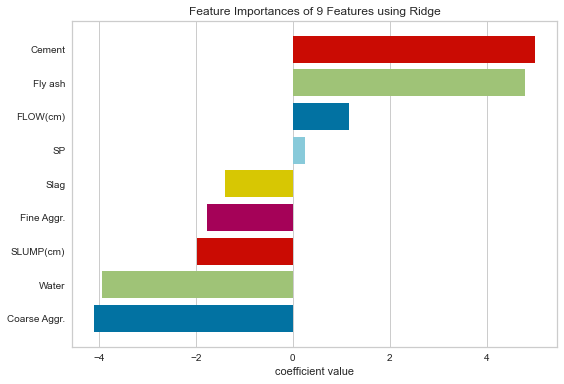

<AxesSubplot:title={'center':'Feature Importances of 9 Features using Ridge'}, xlabel='coefficient value'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances 

model = Ridge(alpha=ridge_cv_model.alpha_)  # ridge_cv_model.alpha_ = 0.91
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()



## Feature importances with Lasso

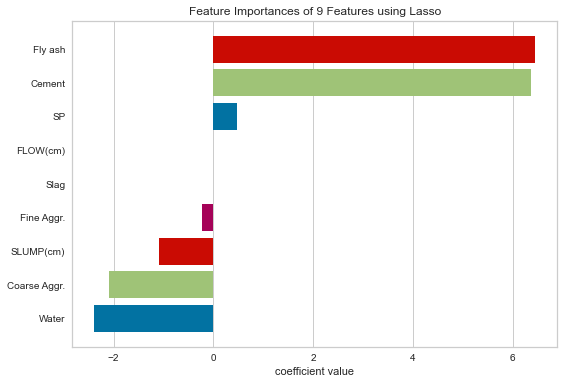

<AxesSubplot:title={'center':'Feature Importances of 9 Features using Lasso'}, xlabel='coefficient value'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances

model = Lasso(alpha=lasso_cv_model.alpha_)  # lasso_cv_model.alpha_ = 0.1
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()